<a href="https://colab.research.google.com/github/AbdelnasserMostafa/-myproject/blob/master/KernelPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://www.superdatascience.com/wp-content/uploads/2017/02/Kernel-PCA.zip

--2019-02-06 08:34:44--  http://www.superdatascience.com/wp-content/uploads/2017/02/Kernel-PCA.zip
Resolving www.superdatascience.com (www.superdatascience.com)... 104.27.172.21, 104.27.173.21, 2606:4700:30::681b:ac15, ...
Connecting to www.superdatascience.com (www.superdatascience.com)|104.27.172.21|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.superdatascience.com/wp-content/uploads/2017/02/Kernel-PCA.zip [following]
--2019-02-06 08:34:44--  https://www.superdatascience.com/wp-content/uploads/2017/02/Kernel-PCA.zip
Connecting to www.superdatascience.com (www.superdatascience.com)|104.27.172.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7214 (7.0K) [application/zip]
Saving to: ‘Kernel-PCA.zip’

Kernel-PCA.zip      100%[===================>]   7.04K  --.-KB/s    in 0s      

2019-02-06 08:34:45 (64.0 MB/s) - ‘Kernel-PCA.zip’ saved [7214/7214]



In [ ]:
ls -la

total 48
drwxr-xr-x 1 root root 4096 Feb  6 08:34 ./
drwxr-xr-x 1 root root 4096 Feb  6 01:40 ../
drwxr-xr-x 4 root root 4096 Feb  4 17:13 .config/
-rw-r--r-- 1 root root 7214 Feb 17  2017 Kernel-PCA.zip
drwxr-xr-x 4 root root 4096 Feb  6 04:16 PCA/
-rw-r--r-- 1 root root 9879 Feb 17  2017 PCA.zip
drwxr-xr-x 1 root root 4096 Feb  4 17:13 sample_data/


In [ ]:
!mkdir KernelPCA

In [ ]:
!unzip Kernel-PCA.zip -d KernelPCA/

Archive:  Kernel-PCA.zip
   creating: KernelPCA/Kernel_PCA/
  inflating: KernelPCA/Kernel_PCA/kernel_pca.py  
   creating: KernelPCA/__MACOSX/
   creating: KernelPCA/__MACOSX/Kernel_PCA/
  inflating: KernelPCA/__MACOSX/Kernel_PCA/._kernel_pca.py  
  inflating: KernelPCA/Kernel_PCA/kernel_pca.R  
  inflating: KernelPCA/__MACOSX/Kernel_PCA/._kernel_pca.R  
  inflating: KernelPCA/Kernel_PCA/Social_Network_Ads.csv  
  inflating: KernelPCA/__MACOSX/Kernel_PCA/._Social_Network_Ads.csv  
  inflating: KernelPCA/__MACOSX/._Kernel_PCA  


In [ ]:
cd KernelPCA/

/content/KernelPCA


In [ ]:
ls -la

total 16
drwxr-xr-x 4 root root 4096 Feb  6 08:35 ./
drwxr-xr-x 1 root root 4096 Feb  6 08:35 ../
drwxr-xr-x 2 root root 4096 Jan 30  2017 Kernel_PCA/
drwxrwxr-x 3 root root 4096 Jan 30  2017 __MACOSX/


In [ ]:
# Kernel PCA

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [ ]:
X

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

array([[4.40e+01, 3.90e+04],
       [3.20e+01, 1.20e+05],
       [3.80e+01, 5.00e+04],
       [3.20e+01, 1.35e+05],
       [5.20e+01, 2.10e+04],
       [5.30e+01, 1.04e+05],
       [3.90e+01, 4.20e+04],
       [3.80e+01, 6.10e+04],
       [3.60e+01, 5.00e+04],
       [3.60e+01, 6.30e+04],
       [3.50e+01, 2.50e+04],
       [3.50e+01, 5.00e+04],
       [4.20e+01, 7.30e+04],
       [4.70e+01, 4.90e+04],
       [5.90e+01, 2.90e+04],
       [4.90e+01, 6.50e+04],
       [4.50e+01, 1.31e+05],
       [3.10e+01, 8.90e+04],
       [4.60e+01, 8.20e+04],
       [4.70e+01, 5.10e+04],
       [2.60e+01, 1.50e+04],
       [6.00e+01, 1.02e+05],
       [3.80e+01, 1.12e+05],
       [4.00e+01, 1.07e+05],
       [4.20e+01, 5.30e+04],
       [3.50e+01, 5.90e+04],
       [4.80e+01, 4.10e+04],
       [4.80e+01, 1.34e+05],
       [3.80e+01, 1.13e+05],
       [2.90e+01, 1.48e+05],
       [2.60e+01, 1.50e+04],
       [6.00e+01, 4.20e+04],
       [2.40e+01, 1.90e+04],
       [4.20e+01, 1.49e+05],
       [4.60e+

In [ ]:
X_test

array([[3.00e+01, 8.70e+04],
       [3.80e+01, 5.00e+04],
       [3.50e+01, 7.50e+04],
       [3.00e+01, 7.90e+04],
       [3.50e+01, 5.00e+04],
       [2.70e+01, 2.00e+04],
       [3.10e+01, 1.50e+04],
       [3.60e+01, 1.44e+05],
       [1.80e+01, 6.80e+04],
       [4.70e+01, 4.30e+04],
       [3.00e+01, 4.90e+04],
       [2.80e+01, 5.50e+04],
       [3.70e+01, 5.50e+04],
       [3.90e+01, 7.70e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.17e+05],
       [3.70e+01, 7.70e+04],
       [1.90e+01, 8.50e+04],
       [5.50e+01, 1.30e+05],
       [3.50e+01, 2.20e+04],
       [3.50e+01, 4.70e+04],
       [4.70e+01, 1.44e+05],
       [4.10e+01, 5.10e+04],
       [4.70e+01, 1.05e+05],
       [2.30e+01, 2.80e+04],
       [4.90e+01, 1.41e+05],
       [2.80e+01, 8.70e+04],
       [2.90e+01, 8.00e+04],
       [3.70e+01, 6.20e+04],
       [3.20e+01, 8.60e+04],
       [2.10e+01, 8.80e+04],
       [3.70e+01, 7.90e+04],
       [5.70e+01, 6.00e+04],
       [3.70e+01, 5.30e+04],
       [2.40e+

In [ ]:
y_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [ ]:
X_test

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [ ]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [ ]:
X_train

array([[ 5.72744226e-02, -6.24922807e-01],
       [ 2.98039307e-01,  5.51069360e-01],
       [-3.27976660e-01, -4.20258944e-01],
       [ 4.01548277e-01,  5.35102802e-01],
       [ 3.75772744e-01, -3.97751670e-01],
       [ 6.42311009e-01,  1.10617361e-01],
       [-2.56837573e-01, -4.81210460e-01],
       [-2.94482629e-01, -3.46410210e-01],
       [-4.31908142e-01, -2.99204966e-01],
       [-3.86586082e-01, -2.06873996e-01],
       [-3.21858102e-01, -1.95600303e-01],
       [-4.75084810e-01, -2.32980852e-01],
       [ 5.50313474e-02, -3.54497244e-01],
       [ 2.32890100e-01, -6.30465977e-01],
       [ 4.33616862e-01, -2.04540417e-01],
       [ 3.83876726e-01, -4.82196197e-01],
       [ 6.48954007e-01,  4.19483401e-01],
       [-1.96271810e-01,  3.79585721e-01],
       [ 3.66579350e-01, -2.54812085e-01],
       [ 2.36781120e-01, -6.24132097e-01],
       [-2.76582419e-01,  2.32375547e-01],
       [ 5.35407237e-01,  1.24159987e-01],
       [ 3.87166412e-01,  4.05416881e-01],
       [ 3.

In [ ]:
X_test

array([[-0.24472209,  0.39962725],
       [-0.32797666, -0.42025894],
       [-0.30396859,  0.00231095],
       [-0.36941608,  0.32648236],
       [-0.47508481, -0.23298085],
       [-0.34442868,  0.20567644],
       [-0.28939408,  0.04963258],
       [ 0.49603794,  0.50390175],
       [-0.20497336,  0.48341398],
       [ 0.22583722, -0.63469458],
       [-0.58117543,  0.10195918],
       [-0.57049332,  0.24813291],
       [-0.37616744, -0.33684435],
       [-0.07872975, -0.17896591],
       [-0.14853518,  0.52049338],
       [ 0.2651519 ,  0.5449029 ],
       [-0.18590281, -0.08092588],
       [-0.13063893,  0.50690282],
       [ 0.59762478,  0.28676453],
       [-0.29092904, -0.17759252],
       [-0.47131472, -0.2424725 ],
       [ 0.61227298,  0.40794159],
       [-0.14069174, -0.55472734],
       [ 0.59588282,  0.13967505],
       [-0.3391188 ,  0.33522281],
       [ 0.62188095,  0.38271353],
       [-0.25728642,  0.46624251],
       [-0.36071648,  0.37956124],
       [-0.34348415,

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[64,  4],
       [ 6, 26]])

In [ ]:
# 90 correct prediction and 10 uncorrect prediction = 90%

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


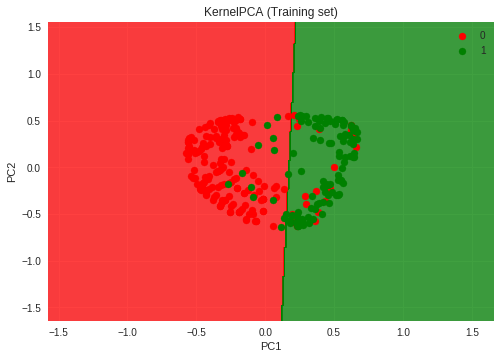

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KernelPCA (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


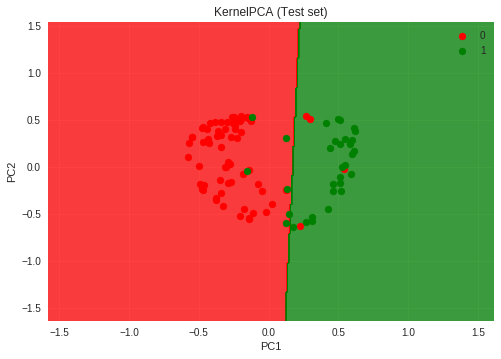

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KernelPCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()